[View in Colaboratory](https://colab.research.google.com/github/neoaksa/Pandas-Matplotlib/blob/master/Matplotlib.ipynb)

## Trand and Histogram

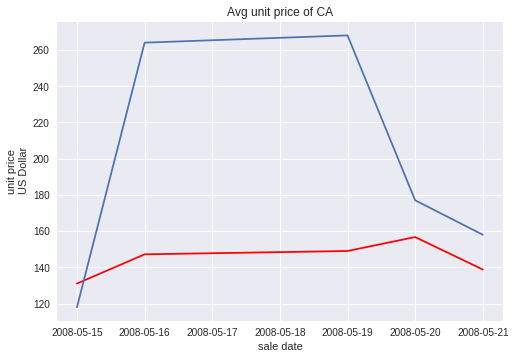

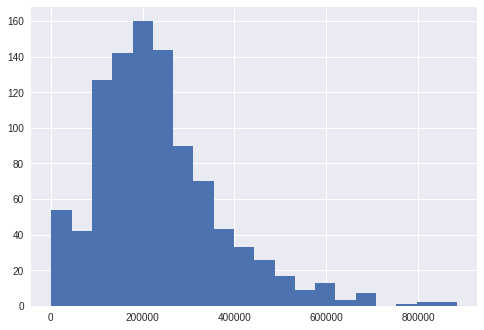

In [18]:
# import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

df1 = pd.read_csv('http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv',
                 index_col=['latitude','longitude'])
df1['unit_price'] = np.where(df1['sq__ft']==0,np.NaN,df1['price']/df1['sq__ft'])
df1['sale_date'] = pd.to_datetime(df1['sale_date']) 
df1 = df1.sort_values(['sale_date','unit_price'])
df2 = df1.groupby('sale_date').agg({'unit_price':np.mean,'sale_date':np.size})
df2 = df2.rename(columns={'sale_date':'count'})
df2.head(5)
# x, y axis
plt.plot(df2.index,df2['unit_price'],color='r')
plt.plot(df2.index,df2['count'])

# set the labels for x, y axis
plt.xlabel('sale date')
plt.ylabel('unit price\n US Dollar')
plt.title('Avg unit price of CA')
# bring it front
plt.show()

# histogram with bin=20
plt.hist(df1['price'],bins=20)
plt.show()

**If we need to draw a trendline, we need to fit a linear regression firstly, then draw this line through plt.plot**
```python
z = np.polyfit(s1,s2,1)
p = np.poly1d(z)
plt.plot(s1,p(s1),'red')
```
### hexbin
hexbin is similar to scatter, but improves the interpretation of data density, by showing the data density in an area by color intensity.



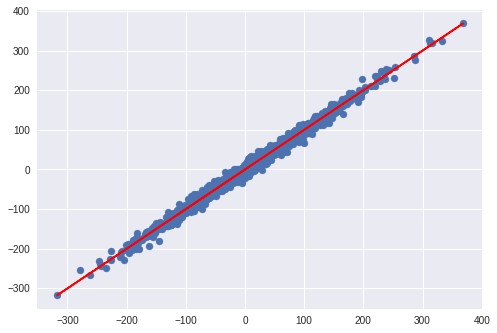

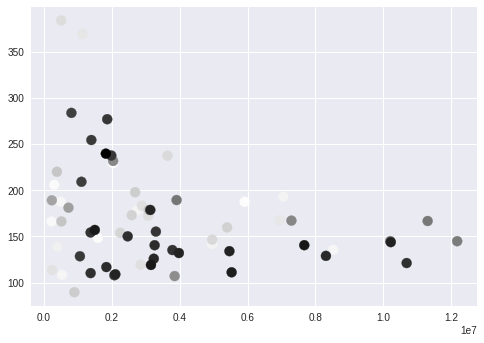

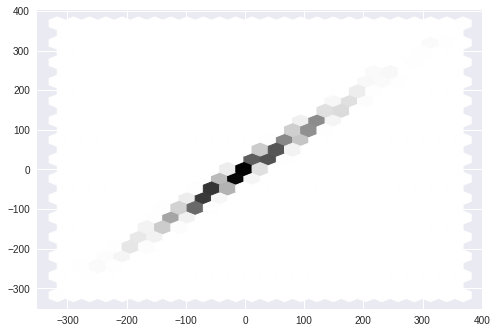

In [41]:
# scatter plot
import numpy as np
import matplotlib.pyplot as plt
s1 = np.random.randn(1,1000)*100
s2 = s1 + np.random.randn(1,1000)*10
plt.scatter(s1,s2)
# add trendline through linear fit
z = np.polyfit(s1[0],s2[0],1)
p = np.poly1d(z)
plt.plot(s1[0],p(s1[0]),'red')
plt.show()
# by group
groups = df1.groupby('zip').agg({'price':np.sum,'unit_price':np.mean})
plt.scatter(groups['price'],groups['unit_price'],s=100,c=groups.index)
# fig,ax = plt.subplots()
# for name, group in groups:
#     # s = size, marker = sharp 
#     plt.scatter(group['price'],group['unit_price'],s=100)
plt.show()

# hexbin plot
plt.hexbin(x=s1,y=s2,reduce_C_function=np.max,gridsize=25)
plt.show()

In [22]:
# stack plot
df3 = df1.groupby(['sale_date','beds']).agg({'price':np.sum})
df3 = df3.unstack(level=0)
df3.fillna(0)
# for stack plot, the first param should b N 1d-array, the second parm should be M*N array
plt.stackplot(np.unique(df1['sale_date']),df3.values)
plt.show

## Pie plot and Bar chart

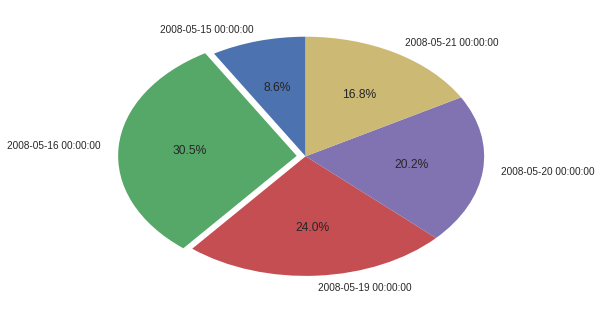

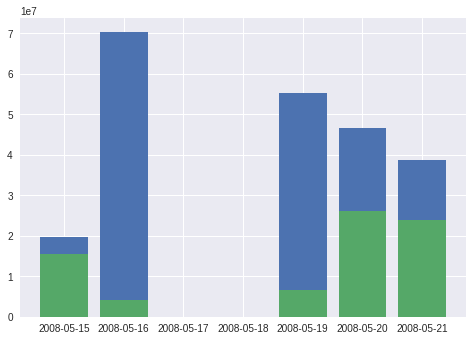

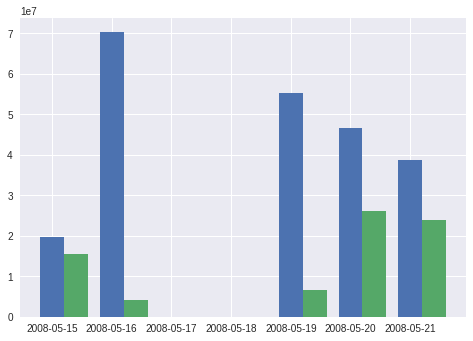

In [71]:
# pie plot
df_pie = df1.groupby(['sale_date']).agg({'price':np.sum})
plt.pie(df_pie['price'],
       labels=df_pie.index,
       startangle=90,
       autopct='%1.1f%%',
       explode=(0,0.05,0,0,0))
plt.show()

# # bar plot
# plt.bar(df_pie.index.get_level_values('sale_date'),df_pie['price'])
# plt.show()
# multi series bar plot
after = np.random.random_sample(5)
df_pie['price_after'] = df_pie['price'] * after
ax = plt.subplot(111)
# stack
ax.bar(df_pie.index.get_level_values('sale_date'),df_pie['price'],align='center')
ax.bar(df_pie.index.get_level_values('sale_date'),df_pie['price_after'],align='center')
plt.show()
# paranel
from matplotlib.dates import date2num
ax1 = plt.subplot(111)
w = 0.4
ax1.bar(date2num(df_pie.index.get_level_values('sale_date').to_pydatetime()),df_pie['price'],width=w, align='center')
ax1.bar(date2num(df_pie.index.get_level_values('sale_date').to_pydatetime())+w,df_pie['price_after'],width=w, align='center')
ax1.xaxis_date()
plt.show()

## Polar coordinates
polar coordinates are used for polar charts, angles, and radii. The central point is called the pole. Note that Matplotlib takes a degree unit for the angle input.

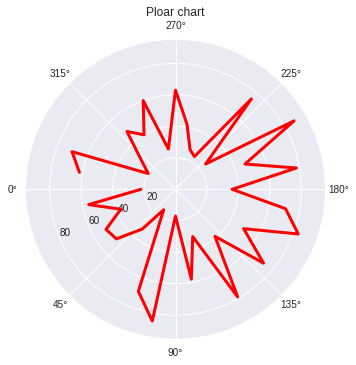

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import random

data_theta = np.arange(0., 2., 1./18.)*np.pi
len(data_theta)
data_theta_rad = []
for i in data_theta:
    data_theta_rad.append(float(i))

data_r = random.sample(range(10, 90), 36)
ax = plt.subplot(111, polar=True)
ax.plot(data_theta_rad, data_r, color='r', linewidth=3)
ax.set_theta_zero_location("W")
ax.set_rmax(95)
ax.grid(True)
ax.set_title("Ploar chart", va='bottom')
plt.show()

**Groupby can is iternatively which returns return the index and new dataframe. **

** *df.index.get_level_values retrieves*  all values by index name**
```python
for type,new_df in df_cust.groupby(level=0):
    plt.plot(new_df.index.get_level_values('sale_date'),new_df['price'],label=type) 
```



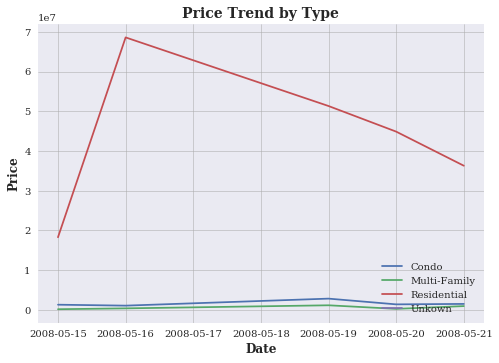

In [119]:
# customization
# x, y axis
df_cust = df1.groupby(['type','sale_date']).agg({'price':np.sum})
# group by index and plot multi lines
for type,new_df in df_cust.groupby(level=0):
#     print(new_df['price'])
    plt.plot(new_df.index.get_level_values('sale_date'),new_df['price'],label=type) 
# plt.ylim(130,160)  # set axis range
plt.xlabel('Date',size=12,fontweight='semibold')  # setting axis label
plt.ylabel('Price',size=12,fontweight='semibold')  # setting axis label
plt.grid(True,linewidth=0.5,color='#aaaaaa',linestyle='-')   # setting grid
plt.title('Price Trend by Type',size=14, fontweight='bold')    # setting title
plt.legend(loc='lower right')     # setting legend position
plt.show()
# save plot
plt.savefig(fname='price trnd by type',dpi=300)



**some configurations for matplotlib**
```
import matplotlib
matplotlib.rcParams.update({'font.size': 30, 'font.family': 'serif'})
matplotlib.rcdefaults() 
```



## Matplotlib suppports following color:

**color with a single letter**
b': Blue

'g': Green

'r': Red

'c': Cyan

'm': Magenta

'y': Yellow

'k': Black

'w': White


**HTML color**
refer [here](https://matplotlib.org/examples/color/named_colors.html)

**RGB code**

(0.1,0.1,0.2) or (0.2,0.2,0.3,0.8). The first three numbers define how much red, green, and blue light should be mixed into the desired color output. The optional fourth number is the alpha value to control the transparency level.

**Hexadecimal**

\#0000ff



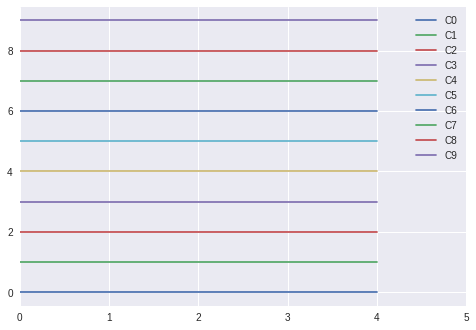

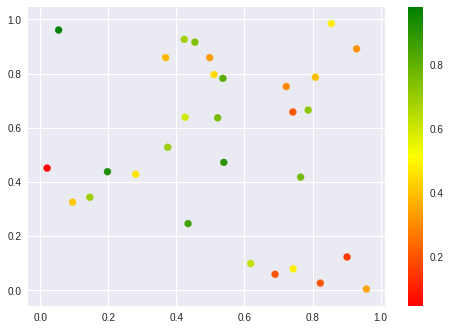

In [11]:
import matplotlib as mpl
# color in matplotlib, C0 to C9
import matplotlib.pyplot as plt
for i in range(10):
    plt.plot([i]*5,c='C'+str(i),label='C'+str(i))
plt.xlim(0,5)
plt.legend()
plt.show()
# mpl.rcParams['axes.prop_cycle']

# color map
import numpy as np
import matplotlib.colors

# Create a 30 random dots
np.random.seed(52)
x,y,c = zip(*np.random.rand(30,3))  # unpack array to 3 elements

# Create a custom linear colormap
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

plt.scatter(x,y,c=c, cmap=cmap)
plt.colorbar()
plt.show()

## Figure Style
#### Shape of Marks 

    'o': Circle
    'x': Cross
    '+': Plus sign
    'P': Filled plus sign
    'D': Filled diamond
    's': Square
    '^': Triangle
** To fine tuning of marker with :**

markeredgecolor, markeredgewidth, and markerfacecolor.

#### Line style


    'solid' or '-': Solid line; default
    'dashed' or '--': Equally spaced dashes
    'dashdot' or '-.': Alternate dashes and dots
    '.': Loose dotted line
    ':': Packed dotted line
    'None', ' ', '': No visible line
    (offset, on-off-dash-seq): Customized dashes


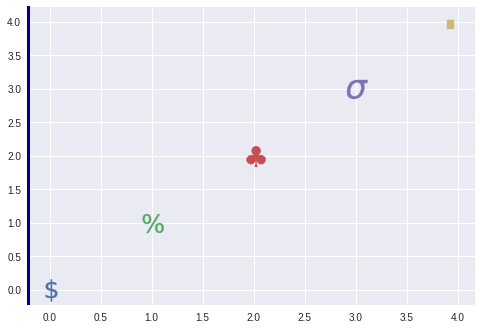

In [19]:
# custom markers
custom_markers = ['$'+x+'$' for x in ['\$','\%','\clubsuit','\sigma','\d']]
for i,marker in enumerate(custom_markers):
    plt.scatter(i%10,i,marker=marker,s=500) # plot each of the markers in size of 100


# setting spine of axis
ax = plt.gca()   # get current axis
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('darkblue')
plt.show()
                                      

## Text

   Font size: Float or relative size, for example, smaller and x-large
    
   Font weight: For example, bold or semibold
    
   Font style: For example, italic
    
   Font family: For example, Arial
    
   Rotation: Angle in degrees; it is vertical or horizontal
    
   Letax support: Click [here](https://matplotlib.org/users/usetex.html)
   
## Arrow
   arrstyles = ['-', '->', '-[', '<-', '<->', 'fancy', 'simple', 'wedge']

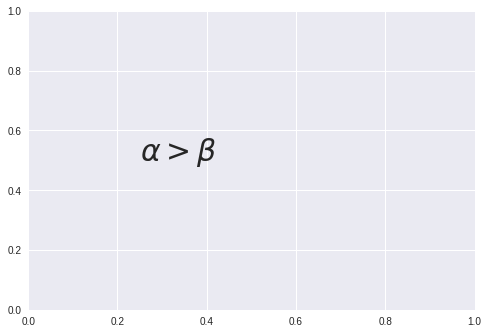

In [126]:
# add text
ax = plt.figure()
plt.text(0.25,0.5,r'$\alpha > \beta$',fontsize=30)
ax.xaxis.set_major_locator(xmajorLocator)    
ax.xaxis.set_minor_locator(xminorLocator)
plt.show()

## Advanced Features
### Subplot()
subplot initiates axies by setting its row, columns and plot number. In this case, subplot(231) means put this axe into first plot of  2 by 3 matrix.

### subplots()
subplots creates a matrix of axes. It return an array of axes. 

### subplot2grid()
subplot2grid is used to create a group of subplot with different size.
axarr = []
axarr.append(plt.subplot2grid((3,3),(0,2), rowspan=3)) # create a subplot crossing 3 rows(position 0,2) within 3 by 3 grid

### fig.add_axes()
create a new plot in the parent figure.


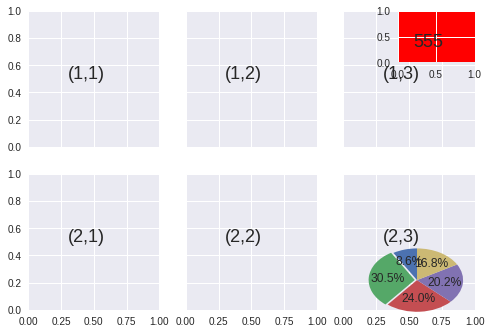

In [20]:
import matplotlib.pyplot as plt
# Initiates a figure area for plotting
fig = plt.figure()

# # Initiates six subplot axes
# ax1 = plt.subplot(231)
# ax2 = plt.subplot(232)
# ax3 = plt.subplot(233)
# ax4 = plt.subplot(234)
# ax5 = plt.subplot(235)
# ax6 = plt.subplot(236)

# # Print the type of ax1
# print(type(ax1))

# # Label each subplot with corresponding identities
# ax1.text(0.3,0.5,'231',fontsize=18)
# ax2.text(0.3,0.5,'232',fontsize=18)
# ax3.text(0.3,0.5,'233',fontsize=18)
# ax4.text(0.3,0.5,'234',fontsize=18)
# ax5.text(0.3,0.5,'234',fontsize=18)
# ax6.text(0.3,0.5,'236',fontsize=18)



# use subplots(), to keep it simple we use share axis
fig, axearr = plt. subplots(2,3,sharex=True,sharey=True)
i=0
for row in axearr:
    i+=1
    j=0
    for axe in row:
        j+=1
        axe.text(0.3,0.5,'('+str(i)+','+str(j)+')',fontsize=18)
# use add_subplot() to add new plot into the same figure
ax7 = fig.add_subplot(555,facecolor='red')
ax7.text(0.2,0.3,'555',fontsize=18)
# set tight layout

# add child plot
ax_child = fig.add_axes([0.7, 0.1, 0.2, 0.2],facecolor='blue')
df_pie = df1.groupby(['sale_date']).agg({'price':np.sum})
plt.pie(df_pie['price'],
#        labels=df_pie.index,
       startangle=90,
       autopct='%1.1f%%',
       explode=(0,0.05,0,0,0))
plt.show()

## Integration with pandas

    line: Line plot (default)
    bar: Vertical bar plot
    barh: Horizontal bar plot
    hist: Histogram
    box: Boxplot
    kde: Kernel Density Estimation (KDE) plot
    density: The same as kde
    area: Area plot
    pie: Pie plot


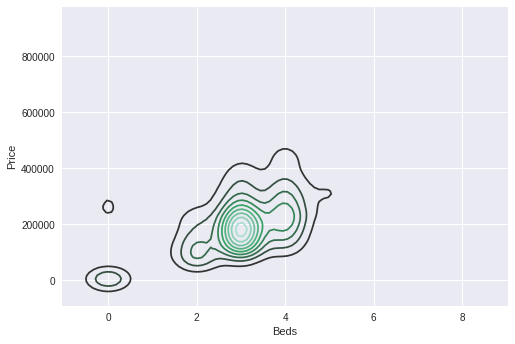

In [42]:
import seaborn as sns
plt.figure()
sns.kdeplot(df1['beds'],df1['price'])
# plt.xlim(0,65)
# plt.ylim(0,6000)
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()

## Seaborn
Seaborn builds on top of Matplotlib and introduces additional plot types. It also makes your traditional Matplotlib plots look a bit prettier.

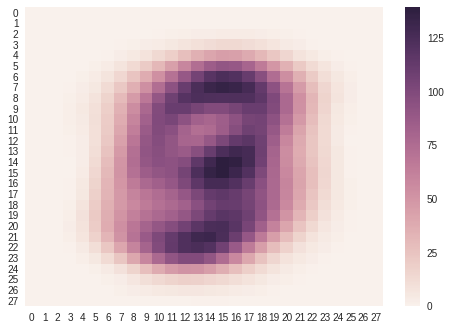

In [55]:
# heatmap
import numpy as np
import seaborn as sns
from keras.datasets import mnist
# we use minist data as sample
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape
x_matrix = np.zeros([28,28])
for x_train_matrix in x_train:
    x_matrix +=x_train_matrix
x_matrix = x_matrix / x_train.shape[0]
sns.heatmap(x_matrix)